# Presentation 1


`imports`, you've seen this before!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [5]:
# if os.path.isfile("test_data.csv"):
#     filepath = "test_data.csv"
#     print("loading from file")

test_data = pd.read_csv("gapminder_internet.csv")
pd.read_csv("2020dataset.csv")

print("done")

done


Maps of all countries with values

In [6]:
# Read the data from the CSV file into a DataFrame
df = pd.read_csv('gapminder_internet.csv')

# Define a function to create a choropleth map figure
def create_map_figure(z_data, colorscale, title, colorbar_title, reversescale=False):
    # Initialize an empty Plotly figure
    fig = go.Figure()

    # Create a Choropleth trace for the map
    trace = go.Choropleth(
        locations=data['country'],              # List of country names for map locations
        locationmode='country names',           # Specify location mode as country names
        z=z_data,                               # Data values for coloring the map
        text=data['country'],                   # Text to display on hover over map
        hovertemplate="<b>%{text}</b><br><br>" + title + ": %{z:.2f}<extra></extra>",  # Hover template for tooltip
        colorscale=colorscale,                  # Color scale for mapping values to colors
        reversescale=reversescale,              # Reverse the color scale if True (for income data)
        colorbar=dict(title=colorbar_title),    # Title for the color bar
        marker_line_color='darkgray',           # Color of the border lines for map markers
        marker_line_width=0.5                   # Width of the border lines for map markers
    )

    # Add the Choropleth trace to the figure
    fig.add_trace(trace)

    # Update geographical layout settings
    fig.update_geos(
        visible=False,                          # Set map visibility to False initially
        showcountries=True,                     # Show country boundaries
        showcoastlines=True,                    # Show coastlines
        projection_type="mercator"              # Use Mercator projection for the map
    )

    # Update overall layout settings
    fig.update_layout(
        title=title,                            # Set the title of the map
        geo=dict(
            showframe=False,                     # Hide map frame
            showcoastlines=True,                 # Show coastlines
            projection_type="mercator"           # Use Mercator projection for the map
        ),
        annotations=[
            dict(
                x=0.5,
                y=-0.1,
                xref='paper',
                yref='paper',
                text='Search a country:',         # Annotation for searching a country
                showarrow=False,
                font=dict(size=14)
            )
        ],
        margin=dict(l=0, r=0, t=30, b=0),         # Adjust margins for the map
        width=1200,                              # Set the width of the map box
        height=900                              # Set the height of the map box
    )

    return fig

# Define a custom color scale for income per person
red_scale = [
    [0.0, 'rgb(255, 255, 255)'],                # White for the lowest values
    [0.2, 'rgb(255, 230, 230)'],
    [0.4, 'rgb(255, 179, 179)'],
    [0.6, 'rgb(255, 128, 128)'],
    [0.8, 'rgb(255, 77, 77)'],
    [1.0, 'rgb(153, 0, 0)']                     # Dark red for the highest values
]

# Define a dictionary containing necessary columns from the DataFrame
data = {
    'country': df['country'],                   # List of country names
    'incomeperperson': df['incomeperperson'],   # List of income per person values
    'internetuserate': df['internetuserate'],   # List of internet usage rate values
    'urbanrate': df['urbanrate']                # List of urban rate values
}

# Create the first world map for income per person with the custom color scale
fig1 = create_map_figure(
    z_data=data['incomeperperson'].clip(upper=100000),   # Clip income values to 100000 for better visualization
    colorscale=red_scale,                               # Use the custom color scale
    title="Income per Person",                          # Set the title of the map
    colorbar_title="Income per Person"                  # Set the color bar title
)

# Create the second world map for internet usage rate
fig2 = create_map_figure(
    z_data=data['internetuserate'],                      # Use internet usage rate values
    colorscale='Blues',                                  # Use the 'Blues' color scale
    title="Internet Usage Rate",                         # Set the title of the map
    colorbar_title="Internet Usage Rate"                 # Set the color bar title
)

# Create the third world map for urban rate
fig3 = create_map_figure(
    z_data=data['urbanrate'],                            # Use urban rate values
    colorscale='Greens',                                 # Use the 'Greens' color scale
    title="Urban Rate",                                  # Set the title of the map
    colorbar_title="Urban Rate"                          # Set the color bar title
)

# Display the maps side by side
display(fig1)
display(fig2)
display(fig3)


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\2776205783.py:32: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\2776205783.py:59: UserWarning:

FixedFormatter should only be used together with FixedLocator



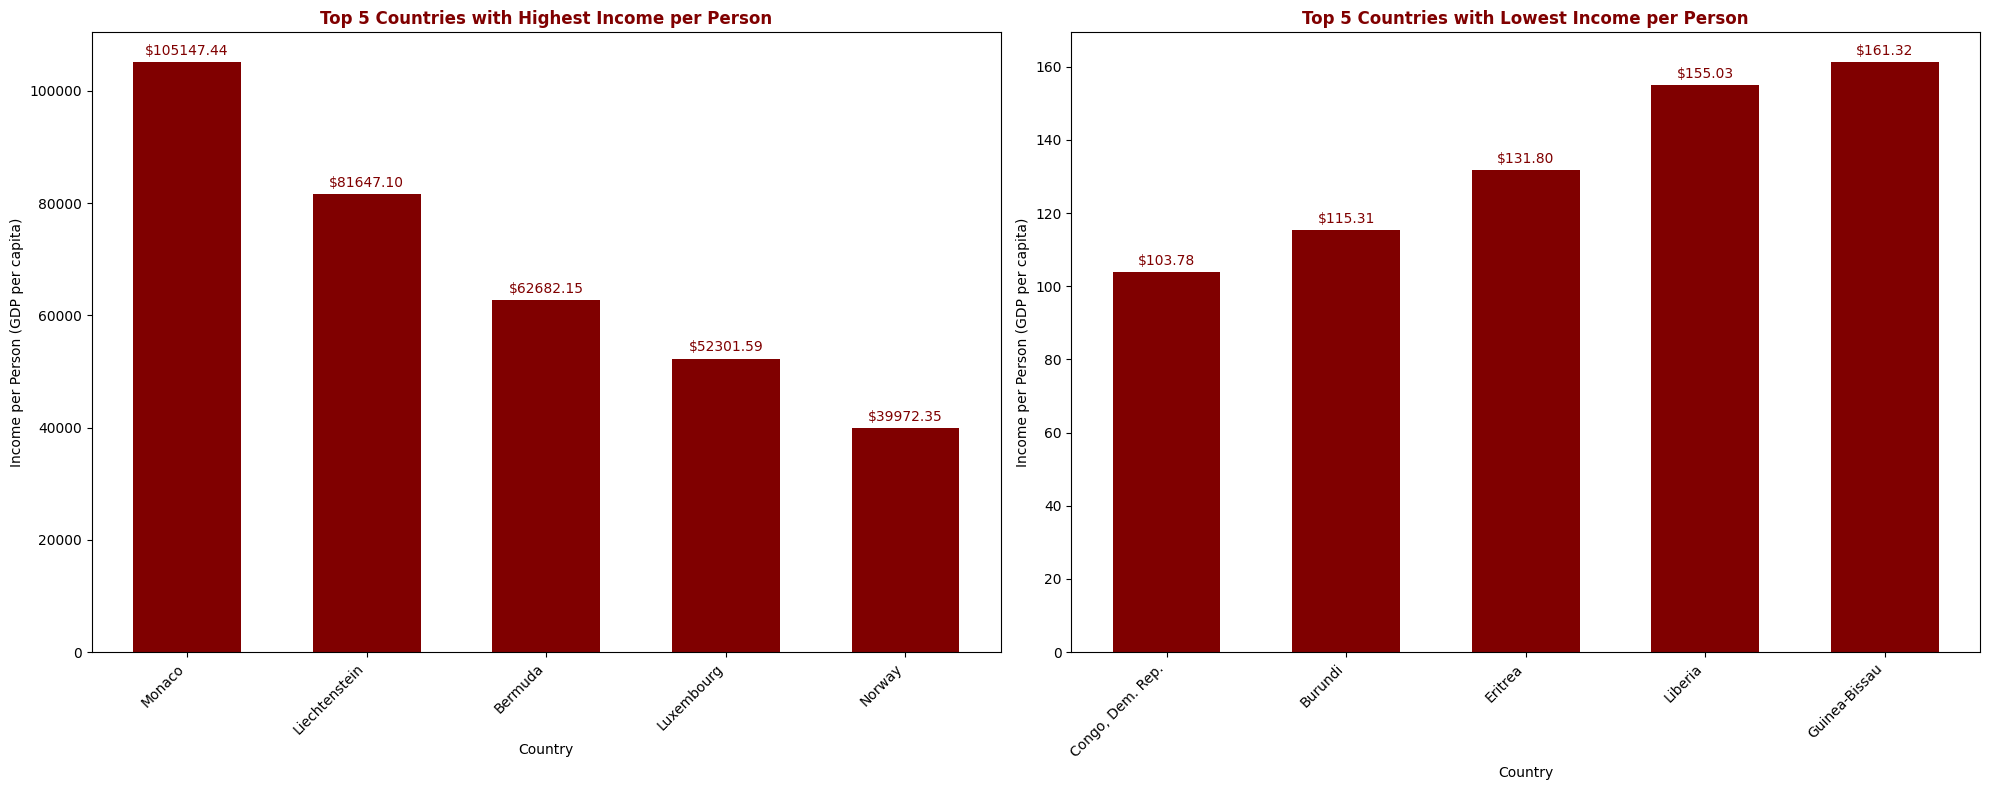

In [7]:
# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')  # Read the CSV file and store the data in a DataFrame called 'df'

# Sort the DataFrame by 'incomeperperson' column in descending order and take the top 5 countries
sorted_df_high_income = df.sort_values(by='incomeperperson', ascending=False).head(5)
# Sort the DataFrame 'df' by the 'incomeperperson' column in descending order,
# and extract the top 5 rows to create a new DataFrame 'sorted_df_high_income'

# Sort the DataFrame by 'incomeperperson' column in ascending order and take the top 5 countries
sorted_df_low_income = df.sort_values(by='incomeperperson', ascending=True).head(5)
# Sort the DataFrame 'df' by the 'incomeperperson' column in ascending order,
# and extract the top 5 rows to create a new DataFrame 'sorted_df_low_income'

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
# Create a figure with 1 row and 2 columns of subplots (axes) and set the overall figure size to (20, 8) inches

# Plot the first bar graph (Top 5 Countries with Highest Income per Person)
bars_high_income = axes[0].bar(sorted_df_high_income['country'], sorted_df_high_income['incomeperperson'],
                                color='#800000', width=0.6)
# Create a bar plot on the first subplot ('axes[0]') using 'country' column as x-axis values
# and 'incomeperperson' column as y-axis values from 'sorted_df_high_income' DataFrame.
# Set the bars color to a dark red ('#800000') and increase the width of the bars to 0.6 for spacing

# Add labels and title to the first plot
axes[0].set_xlabel('Country')  # Set the x-axis label to 'Country'
axes[0].set_ylabel('Income per Person (GDP per capita)')  # Set the y-axis label
axes[0].set_title('Top 5 Countries with Highest Income per Person', fontweight='bold', color='#800000')
# Set the title of the first plot to 'Top 5 Countries with Highest Income per Person'
# with bold fontweight and dark red color

axes[0].set_xticklabels(sorted_df_high_income['country'], rotation=45, ha='right')
# Set the x-axis tick labels to the country names from 'sorted_df_high_income' DataFrame,
# rotate them 45 degrees for better visibility, and align them to the right

# Add dollar sign symbol and value above each bar in the first plot
for bar in bars_high_income:
    height = bar.get_height()  # Get the height of the current bar
    axes[0].annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')
    # Annotate each bar with the income value (formatted to 2 decimal places) above the bar.
    # Set the annotation position (xy) at the center of the bar,
    # and adjust the text position (xytext) above the bar with a small offset

# Plot the second bar graph (Top 5 Countries with Lowest Income per Person)
bars_low_income = axes[1].bar(sorted_df_low_income['country'], sorted_df_low_income['incomeperperson'],
                               color='#800000', width=0.6)
# Create a bar plot on the second subplot ('axes[1]') using 'country' column as x-axis values
# and 'incomeperperson' column as y-axis values from 'sorted_df_low_income' DataFrame.
# Set the bars color to a dark red ('#800000') and increase the width of the bars to 0.6 for spacing

# Add labels and title to the second plot
axes[1].set_xlabel('Country')  # Set the x-axis label to 'Country'
axes[1].set_ylabel('Income per Person (GDP per capita)')  # Set the y-axis label
axes[1].set_title('Top 5 Countries with Lowest Income per Person', fontweight='bold', color='#800000')
# Set the title of the second plot to 'Top 5 Countries with Lowest Income per Person'
# with bold fontweight and dark red color

axes[1].set_xticklabels(sorted_df_low_income['country'], rotation=45, ha='right')
# Set the x-axis tick labels to the country names from 'sorted_df_low_income' DataFrame,
# rotate them 45 degrees for better visibility, and align them to the right

# Add dollar sign symbol and value above each bar in the second plot
for bar in bars_low_income:
    height = bar.get_height()  # Get the height of the current bar
    axes[1].annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')
    # Annotate each bar with the income value (formatted to 2 decimal places) above the bar.
    # Set the annotation position (xy) at the center of the bar,
    # and adjust the text position (xytext) above the bar with a small offset

# Adjust layout and display the plots
plt.tight_layout()  # Automatically adjust subplot parameters for a tight layout
plt.show()          # Display the plots on the screen


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\1633039956.py:32: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\1633039956.py:59: UserWarning:

FixedFormatter should only be used together with FixedLocator



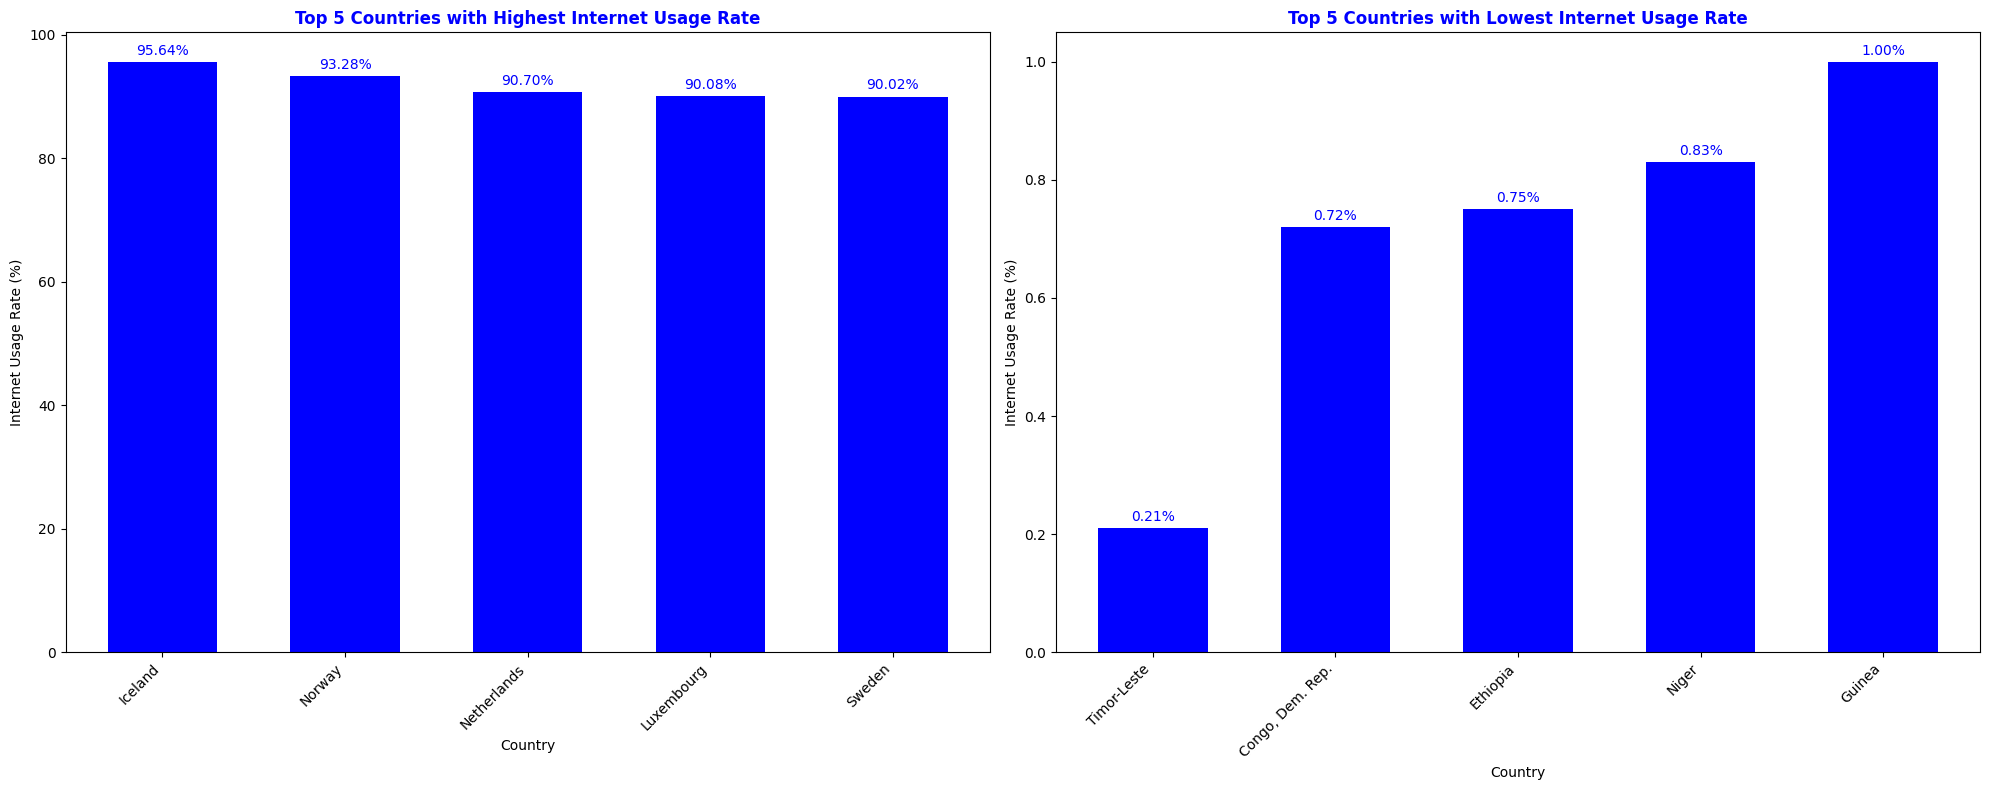

In [8]:
# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')  # Read the CSV file and store the data in a DataFrame called 'df'

# Sort the DataFrame by 'internetuserate' column in descending order and take the top 5 countries
sorted_df_high_internet = df.sort_values(by='internetuserate', ascending=False).head(5)
# Sort the DataFrame 'df' by the 'internetuserate' column in descending order,
# and extract the top 5 rows to create a new DataFrame 'sorted_df_high_internet'

# Sort the DataFrame by 'internetuserate' column in ascending order and take the top 5 countries
sorted_df_low_internet = df.sort_values(by='internetuserate', ascending=True).head(5)
# Sort the DataFrame 'df' by the 'internetuserate' column in ascending order,
# and extract the top 5 rows to create a new DataFrame 'sorted_df_low_internet'

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
# Create a figure with 1 row and 2 columns of subplots (axes) and set the overall figure size to (20, 8) inches

# Plot the first bar graph (Top 5 Countries with Highest Internet Usage Rate)
bars_high_internet = axes[0].bar(sorted_df_high_internet['country'], sorted_df_high_internet['internetuserate'],
                                color='blue', width=0.6)
# Create a bar plot on the first subplot ('axes[0]') using 'country' column as x-axis values
# and 'internetuserate' column as y-axis values from 'sorted_df_high_internet' DataFrame.
# Set the bars color to blue and the width of the bars to 0.6

# Add labels and title to the first plot
axes[0].set_xlabel('Country')  # Set the x-axis label to 'Country'
axes[0].set_ylabel('Internet Usage Rate (%)')  # Set the y-axis label to 'Internet Usage Rate (%)'
axes[0].set_title('Top 5 Countries with Highest Internet Usage Rate', fontweight='bold', color='blue')
# Set the title of the first plot to 'Top 5 Countries with Highest Internet Usage Rate'
# with bold fontweight and blue color

axes[0].set_xticklabels(sorted_df_high_internet['country'], rotation=45, ha='right')
# Set the x-axis tick labels to the country names from 'sorted_df_high_internet' DataFrame,
# rotate them 45 degrees for better visibility, and align them to the right

# Add percentage sign symbol and value above each bar in the first plot
for bar in bars_high_internet:
    height = bar.get_height()  # Get the height of the current bar
    axes[0].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')
    # Annotate each bar with the percentage value (formatted to 2 decimal places) above the bar.
    # Set the annotation position (xy) at the center of the bar,
    # and adjust the text position (xytext) above the bar with a small offset

# Plot the second bar graph (Top 5 Countries with Lowest Internet Usage Rate)
bars_low_internet = axes[1].bar(sorted_df_low_internet['country'], sorted_df_low_internet['internetuserate'],
                            color='blue', width=0.6)
# Create a bar plot on the second subplot ('axes[1]') using 'country' column as x-axis values
# and 'internetuserate' column as y-axis values from 'sorted_df_low_internet' DataFrame.
# Set the bars color to blue and the width of the bars to 0.6

# Add labels and title to the second plot
axes[1].set_xlabel('Country')  # Set the x-axis label to 'Country'
axes[1].set_ylabel('Internet Usage Rate (%)')  # Set the y-axis label to 'Internet Usage Rate (%)'
axes[1].set_title('Top 5 Countries with Lowest Internet Usage Rate', fontweight='bold', color='blue')
# Set the title of the second plot to 'Top 5 Countries with Lowest Internet Usage Rate'
# with bold fontweight and blue color

axes[1].set_xticklabels(sorted_df_low_internet['country'], rotation=45, ha='right')
# Set the x-axis tick labels to the country names from 'sorted_df_low_internet' DataFrame,
# rotate them 45 degrees for better visibility, and align them to the right

# Add percentage sign symbol and value above each bar in the second plot
for bar in bars_low_internet:
    height = bar.get_height()  # Get the height of the current bar
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')
    # Annotate each bar with the percentage value (formatted to 2 decimal places) above the bar.
    # Set the annotation position (xy) at the center of the bar,
    # and adjust the text position (xytext) above the bar with a small offset

# Adjust layout and display the plots
plt.tight_layout()  # Automatically adjust subplot parameters for a tight layout
plt.show()          # Display the plots on the screen


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\4032955298.py:32: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\4032955298.py:59: UserWarning:

FixedFormatter should only be used together with FixedLocator



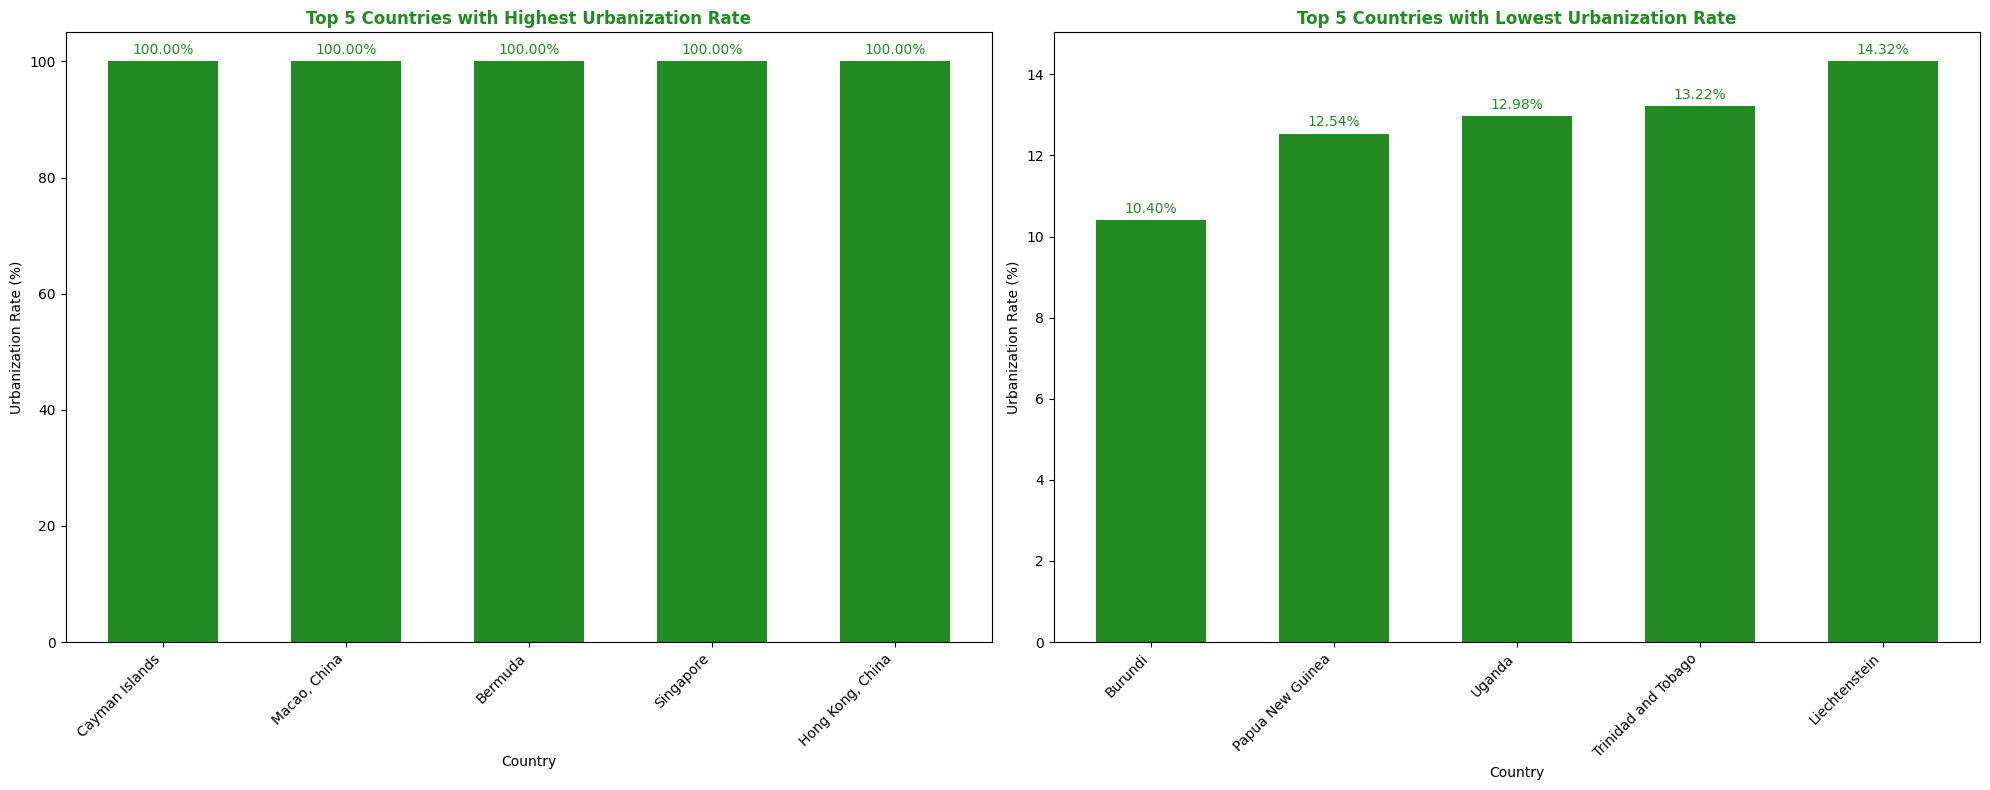

In [9]:
# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')  # Read the CSV file and store the data in a DataFrame called 'df'

# Sort the DataFrame by 'urbanrate' column in descending order and take the top 5 countries
sorted_df_high_urban = df.sort_values(by='urbanrate', ascending=False).head(5)
# Sort the DataFrame 'df' by the 'urbanrate' column in descending order,
# and extract the top 5 rows to create a new DataFrame 'sorted_df_high_urban'

# Sort the DataFrame by 'urbanrate' column in ascending order and take the top 5 countries
sorted_df_low_urban = df.sort_values(by='urbanrate', ascending=True).head(5)
# Sort the DataFrame 'df' by the 'urbanrate' column in ascending order,
# and extract the top 5 rows to create a new DataFrame 'sorted_df_low_urban'

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
# Create a figure with 1 row and 2 columns of subplots (axes) and set the overall figure size to (20, 8) inches

# Plot the first bar graph (Top 5 Countries with Highest Urbanization Rate)
bars_high_urban = axes[0].bar(sorted_df_high_urban['country'], sorted_df_high_urban['urbanrate'],
                            color='#228B22', width=0.6)  # Increase the width for spacing
# Create a bar plot on the first subplot ('axes[0]') using 'country' column as x-axis values
# and 'urbanrate' column as y-axis values from 'sorted_df_high_urban' DataFrame.
# Set the bars color to forest green ('#228B22') and increase the width of the bars to 0.6 for spacing

# Add labels and title to the first plot
axes[0].set_xlabel('Country')  # Set the x-axis label to 'Country'
axes[0].set_ylabel('Urbanization Rate (%)')  # Set the y-axis label
axes[0].set_title('Top 5 Countries with Highest Urbanization Rate', fontweight='bold', color='#228B22')
# Set the title of the first plot to 'Top 5 Countries with Highest Urbanization Rate'
# with bold fontweight and forest green color

axes[0].set_xticklabels(sorted_df_high_urban['country'], rotation=45, ha='right')
# Set the x-axis tick labels to the country names from 'sorted_df_high_urban' DataFrame,
# rotate them 45 degrees for better visibility, and align them to the right

# Add percentage sign symbol and value above each bar in the first plot
for bar in bars_high_urban:
    height = bar.get_height()  # Get the height of the current bar
    axes[0].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#228B22')
    # Annotate each bar with the urbanization rate value (formatted to 2 decimal places) above the bar.
    # Set the annotation position (xy) at the center of the bar,
    # and adjust the text position (xytext) above the bar with a small offset

# Plot the second bar graph (Top 5 Countries with Lowest Urbanization Rate)
bars_low_urban = axes[1].bar(sorted_df_low_urban['country'], sorted_df_low_urban['urbanrate'],
                            color='#228B22', width=0.6)  # Increase the width for spacing
# Create a bar plot on the second subplot ('axes[1]') using 'country' column as x-axis values
# and 'urbanrate' column as y-axis values from 'sorted_df_low_urban' DataFrame.
# Set the bars color to forest green ('#228B22') and increase the width of the bars to 0.6 for spacing

# Add labels and title to the second plot
axes[1].set_xlabel('Country')  # Set the x-axis label to 'Country'
axes[1].set_ylabel('Urbanization Rate (%)')  # Set the y-axis label
axes[1].set_title('Top 5 Countries with Lowest Urbanization Rate', fontweight='bold', color='#228B22')
# Set the title of the second plot to 'Top 5 Countries with Lowest Urbanization Rate'
# with bold fontweight and forest green color

axes[1].set_xticklabels(sorted_df_low_urban['country'], rotation=45, ha='right')
# Set the x-axis tick labels to the country names from 'sorted_df_low_urban' DataFrame,
# rotate them 45 degrees for better visibility, and align them to the right

# Add percentage sign symbol and value above each bar in the second plot
for bar in bars_low_urban:
    height = bar.get_height()  # Get the height of the current bar
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#228B22')
    # Annotate each bar with the urbanization rate value (formatted to 2 decimal places) above the bar.
    # Set the annotation position (xy) at the center of the bar,
    # and adjust the text position (xytext) above the bar with a small offset

# Adjust layout and display the plots
plt.tight_layout()  # Automatically adjust subplot parameters for a tight layout
plt.show()          # Display the plots on the screen


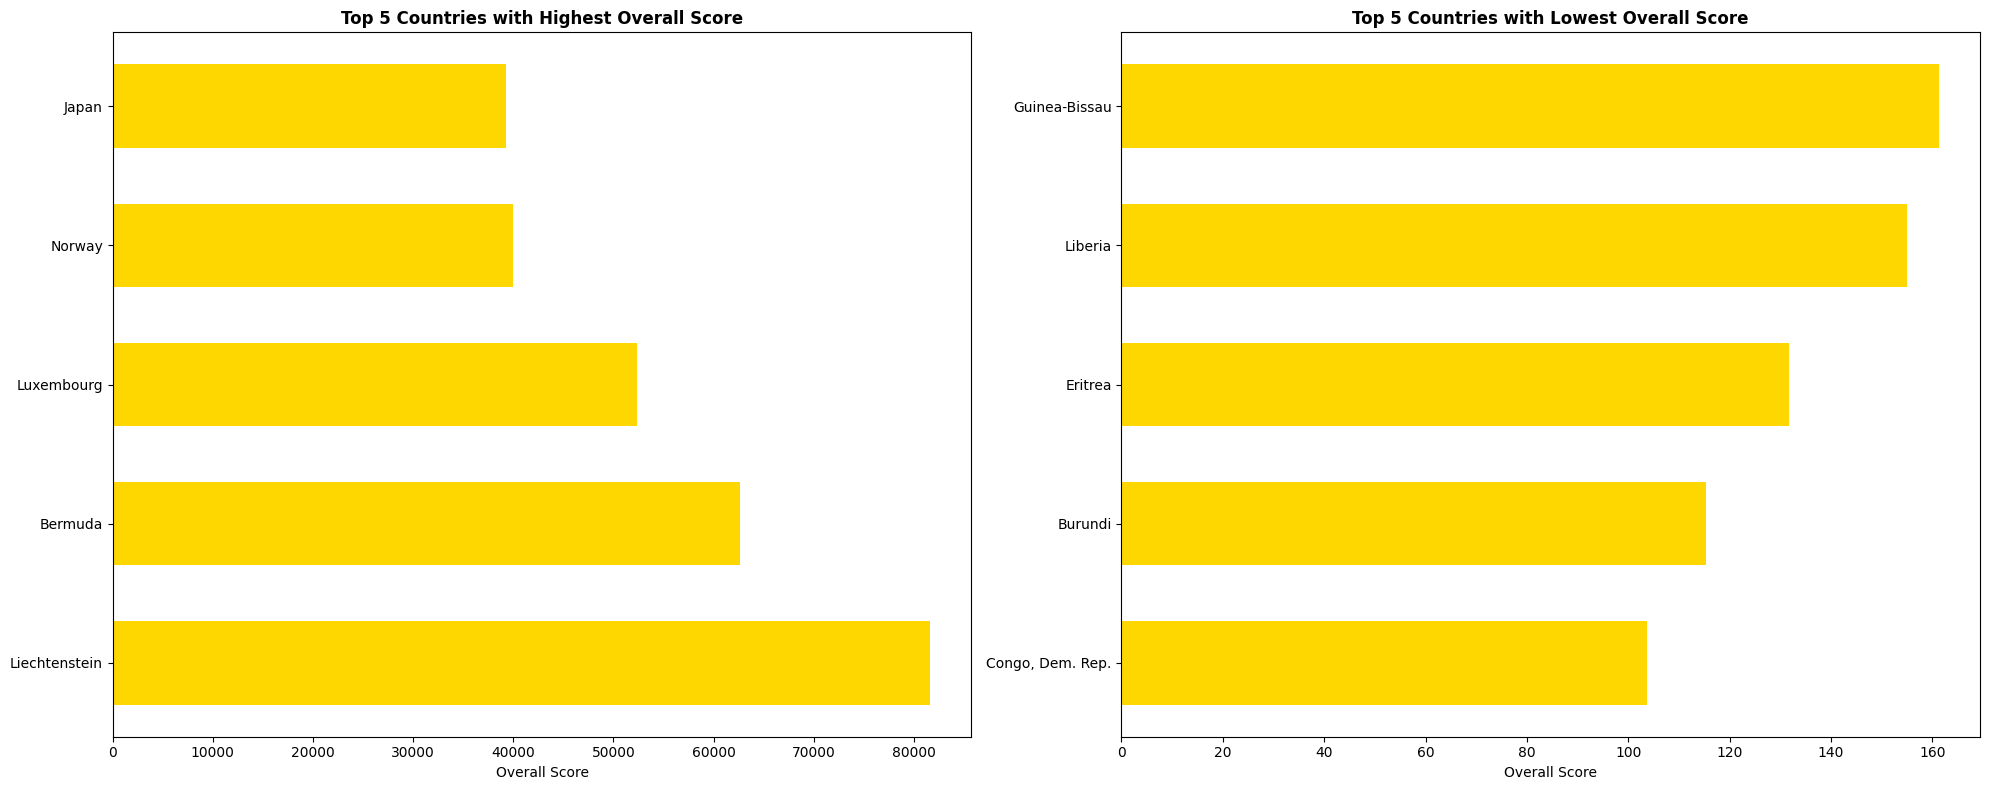

In [10]:
# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')  # Read the CSV file and store the data in a DataFrame called 'df'

# Drop rows with missing data in specified columns
cols_to_check = ['incomeperperson', 'internetuserate', 'urbanrate']
df = df.dropna(subset=cols_to_check)
# Remove rows from the DataFrame 'df' that have missing values in the specified columns

# Calculate the overall score for each country
df['Overall_Score'] = df[cols_to_check].max(axis=1)
# Create a new column 'Overall_Score' in the DataFrame 'df' which contains the maximum value
# across the specified columns ('incomeperperson', 'internetuserate', 'urbanrate') for each row

# Sort the DataFrame by 'Overall_Score' column in descending order and take the top 5 countries
sorted_df_high_score = df.sort_values(by='Overall_Score', ascending=False).head(5)
# Sort the DataFrame 'df' by the 'Overall_Score' column in descending order,
# and extract the top 5 rows to create a new DataFrame 'sorted_df_high_score'

# Sort the DataFrame by 'Overall_Score' column in ascending order and take the top 5 countries
sorted_df_low_score = df.sort_values(by='Overall_Score', ascending=True).head(5)
# Sort the DataFrame 'df' by the 'Overall_Score' column in ascending order,
# and extract the top 5 rows to create a new DataFrame 'sorted_df_low_score'

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
# Create a figure with 1 row and 2 columns of subplots (axes) and set the overall figure size to (20, 8) inches

# Plot the first bar graph (Top 5 Countries with Highest Overall Score)
bars_high_score = axes[0].barh(sorted_df_high_score['country'], sorted_df_high_score['Overall_Score'],
                                color='#FFD700', height=0.6)
# Create a horizontal bar plot on the first subplot ('axes[0]') using 'country' column as y-axis values
# and 'Overall_Score' column as x-axis values from 'sorted_df_high_score' DataFrame.
# Set the bars color to darker yellow ('#FFD700') and set the bar height to 0.6 for spacing

# Add labels and title to the first plot
axes[0].set_xlabel('Overall Score')  # Set the x-axis label to 'Overall Score'
axes[0].set_title('Top 5 Countries with Highest Overall Score', fontweight='bold', color='black')
# Set the title of the first plot to 'Top 5 Countries with Highest Overall Score'
# with bold fontweight and black color

# Plot the second bar graph (Top 5 Countries with Lowest Overall Score)
bars_low_score = axes[1].barh(sorted_df_low_score['country'], sorted_df_low_score['Overall_Score'],
                            color='#FFD700', height=0.6)
# Create a horizontal bar plot on the second subplot ('axes[1]') using 'country' column as y-axis values
# and 'Overall_Score' column as x-axis values from 'sorted_df_low_score' DataFrame.
# Set the bars color to darker yellow ('#FFD700') and set the bar height to 0.6 for spacing

# Add labels and title to the second plot
axes[1].set_xlabel('Overall Score')  # Set the x-axis label to 'Overall Score'
axes[1].set_title('Top 5 Countries with Lowest Overall Score', fontweight='bold', color='black')
# Set the title of the second plot to 'Top 5 Countries with Lowest Overall Score'
# with bold fontweight and black color

# Adjust layout and display the plots
plt.tight_layout()  # Automatically adjust subplot parameters for a tight layout
plt.show()          # Display the plots on the screen


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\3994006302.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\3994006302.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\3994006302.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

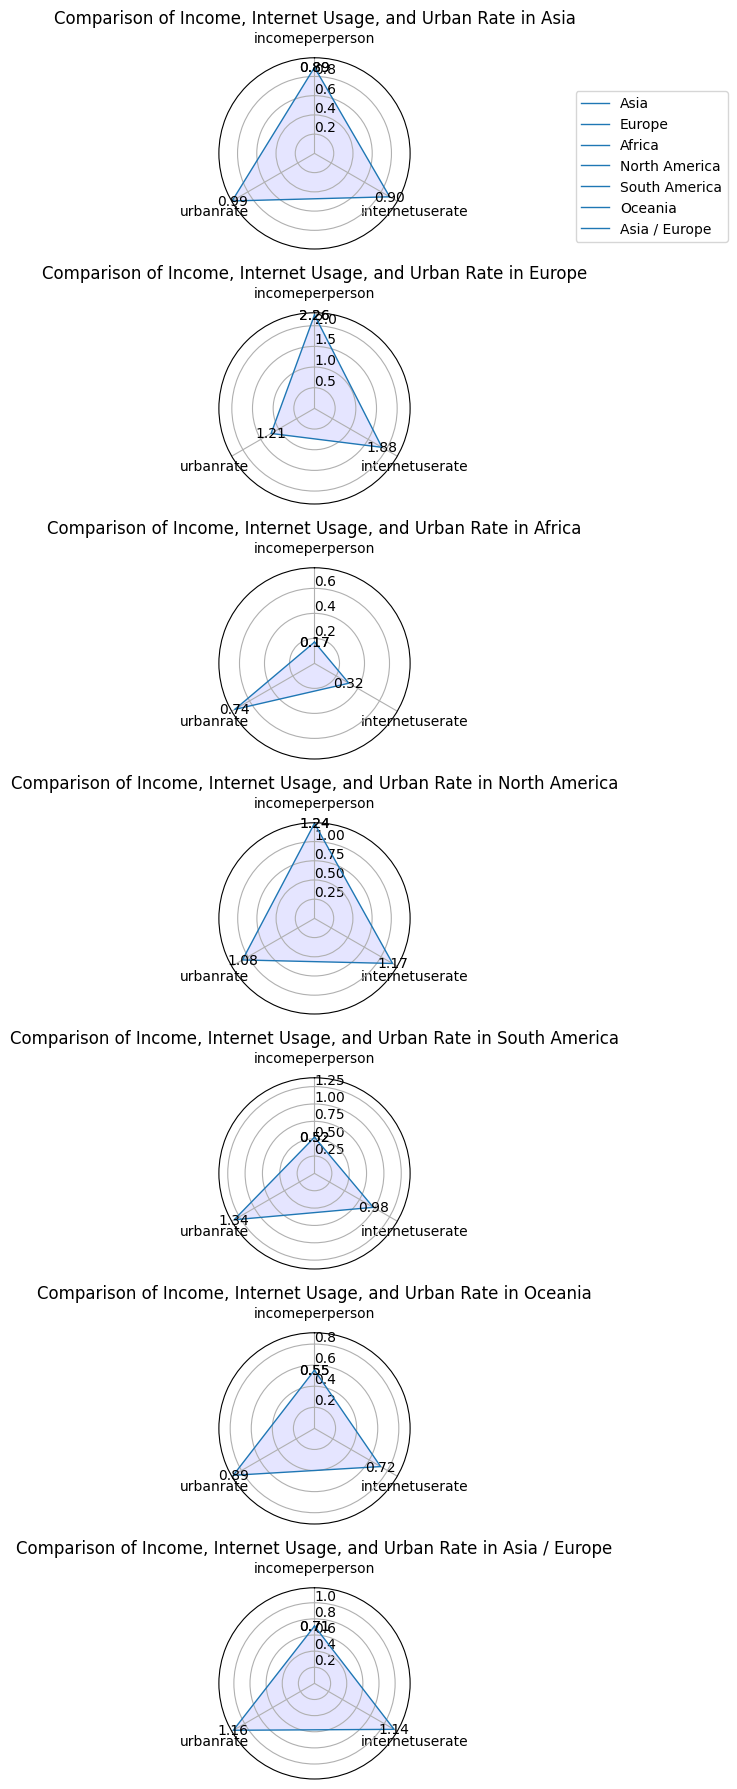

In [11]:
# Read the data from the CSV file into a pandas DataFrame
data = pd.read_csv('gapminder_internet.csv')

# Calculate overall averages for normalization
overall_avg_income = data['incomeperperson'].mean()  # Calculate the mean income per person across all data
overall_avg_internet = data['internetuserate'].mean()  # Calculate the mean internet usage rate across all data
overall_avg_urban = data['urbanrate'].mean()  # Calculate the mean urban rate across all data

# Create subplots for each continent's radar chart
fig, axs = plt.subplots(len(['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Asia / Europe']), 1, figsize=(10, 18), subplot_kw=dict(polar=True))
# Create a grid of subplots, one for each continent's radar chart, with a specified size and polar projection

# Loop through each continent, filter data, normalize variables, and plot radar chart
continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Asia / Europe']
for idx, continent in enumerate(continents):
    continent_data = data[data['continent'] == continent]  # Filter data for the current continent
    
    # Normalize the data for each variable based on overall averages
    def normalize_column(col, avg_val):
        return col / avg_val
    # Define a function to normalize a column by dividing each value by the specified average
    
    continent_data['incomeperperson'] = normalize_column(continent_data['incomeperperson'], overall_avg_income)
    continent_data['internetuserate'] = normalize_column(continent_data['internetuserate'], overall_avg_internet)
    continent_data['urbanrate'] = normalize_column(continent_data['urbanrate'], overall_avg_urban)
    # Apply the normalization function to income, internet usage, and urban rate columns

    # Compute the mean values for each variable in the continent
    variables = ['incomeperperson', 'internetuserate', 'urbanrate']
    mean_values = continent_data[variables].mean()
    # Calculate the mean values of the normalized variables for the current continent

    # Number of variables
    num_variables = len(variables)

    # Create an array of angles for the radar chart
    angles = [n / float(num_variables) * 2 * 3.14159 for n in range(num_variables)]
    angles += angles[:1]
    # Calculate the angles (in radians) for each variable to plot on the radar chart, including repeating the first angle to close the shape

    # Create the radar plot for the current continent
    ax = axs[idx]  # Get the current subplot axis
    ax.set_theta_offset(3.14159 / 2)  # Set the offset angle to place zero degrees at the top of the plot
    ax.set_theta_direction(-1)  # Set the direction of rotation to be clockwise
    ax.set_xticks(angles[:-1])  # Set the x-axis tick positions based on the angles
    ax.set_xticklabels(variables)  # Set the labels for each tick based on the variable names
    ax.set_rlabel_position(0)  # Set the position of the radial axis labels

    # Plot the data for the current continent
    values = mean_values.values.tolist()  # Convert the mean values to a list
    values += values[:1]  # Repeat the first value to close the shape of the radar chart
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=continent)  # Plot the radar chart for the current continent
    ax.fill(angles, values, 'b', alpha=0.1)  # Fill the area under the radar chart with a light blue color

    # Display values next to each axis
    for angle, value in zip(angles, values):
        ax.text(angle, value, f'{value:.2f}', ha='center', va='center')
    # Display the numeric values next to each axis, aligned at the corresponding angle and value
    
    # Add title for each continent's radar chart
    ax.set_title(f"Comparison of Income, Internet Usage, and Urban Rate in {continent}")
    # Set the title for the current subplot

# Add a common legend to the subplots
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.95))
# Add a legend to the overall figure, specifying its position

# Adjust layout and display the plot
plt.tight_layout()
# Adjust the layout of the subplots for better spacing
plt.show()
# Display the complete figure with radar charts and legend


# Year 2020 values

In [12]:

# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Function to create the map figure
def create_map_figure(z_data, colorscale, title, colorbar_title, reversescale=False):
    fig = go.Figure()

    trace = go.Choropleth(
        locations=data['country'],
        locationmode='country names',
        z=z_data,
        text=data['country'],
        hovertemplate="<b>%{text}</b><br><br>" +
                    title + ": %{z:.2f}<extra></extra>",
        colorscale=colorscale,
        reversescale=reversescale,  # Set reversescale to True for income data
        colorbar=dict(title=colorbar_title),
        marker_line_color='darkgray',
        marker_line_width=0.5
    )

    fig.add_trace(trace)

    fig.update_geos(
        visible=False,
        showcountries=True,
        showcoastlines=True,
        projection_type="mercator"
    )

    fig.update_layout(
        title=title,
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type="mercator"
        ),
        annotations=[
            dict(
                x=0.5,
                y=-0.1,
                xref='paper',
                yref='paper',
                text='Search a country:',
                showarrow=False,
                font=dict(size=14)
            )
        ],
        margin=dict(l=0, r=0, t=30, b=0),  # Adjust the margins
        width=1200,  # Adjust the width of the map box
        height=900  # Adjust the height of the map box
    )

    return fig

# Create a custom color scale with values from 20k to the lowest value fading to white
red_scale = [
    [0.0, 'rgb(255, 255, 255)'],  # White for the lowest values
    [0.2, 'rgb(255, 230, 230)'],
    [0.4, 'rgb(255, 179, 179)'],
    [0.6, 'rgb(255, 128, 128)'],
    [0.8, 'rgb(255, 77, 77)'],
    [1.0, 'rgb(153, 0, 0)']
]

# Define the 'data' dictionary containing the necessary columns
data = {
    'country': df['country'],
    'incomeperperson': df['incomeperperson'],
    'internetuserate': df['internetuserate'],
    'urbanrate': df['urbanrate']
}

# Create the first world map for income per person with the custom color scale and the color scale reversed
fig1 = create_map_figure(
    z_data=data['incomeperperson'].clip(upper=100000),
    colorscale=red_scale,
    title="Income per Person",
    colorbar_title="Income per Person",
    reversescale=False  # Set reversescale to True for income data
)

# Create the second world map for internet usage rate
fig2 = create_map_figure(
    z_data=data['internetuserate'],
    colorscale='Blues',
    title="Internet Usage Rate",
    colorbar_title="Internet Usage Rate"
)

# Create the third world map for urban rate
fig3 = create_map_figure(
    z_data=data['urbanrate'],
    colorscale='Greens',
    title="Urban Rate",
    colorbar_title="Urban Rate"
)

# Display the maps side by side
display(fig1)
display(fig2)
display(fig3)


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\1102086988.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\1102086988.py:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



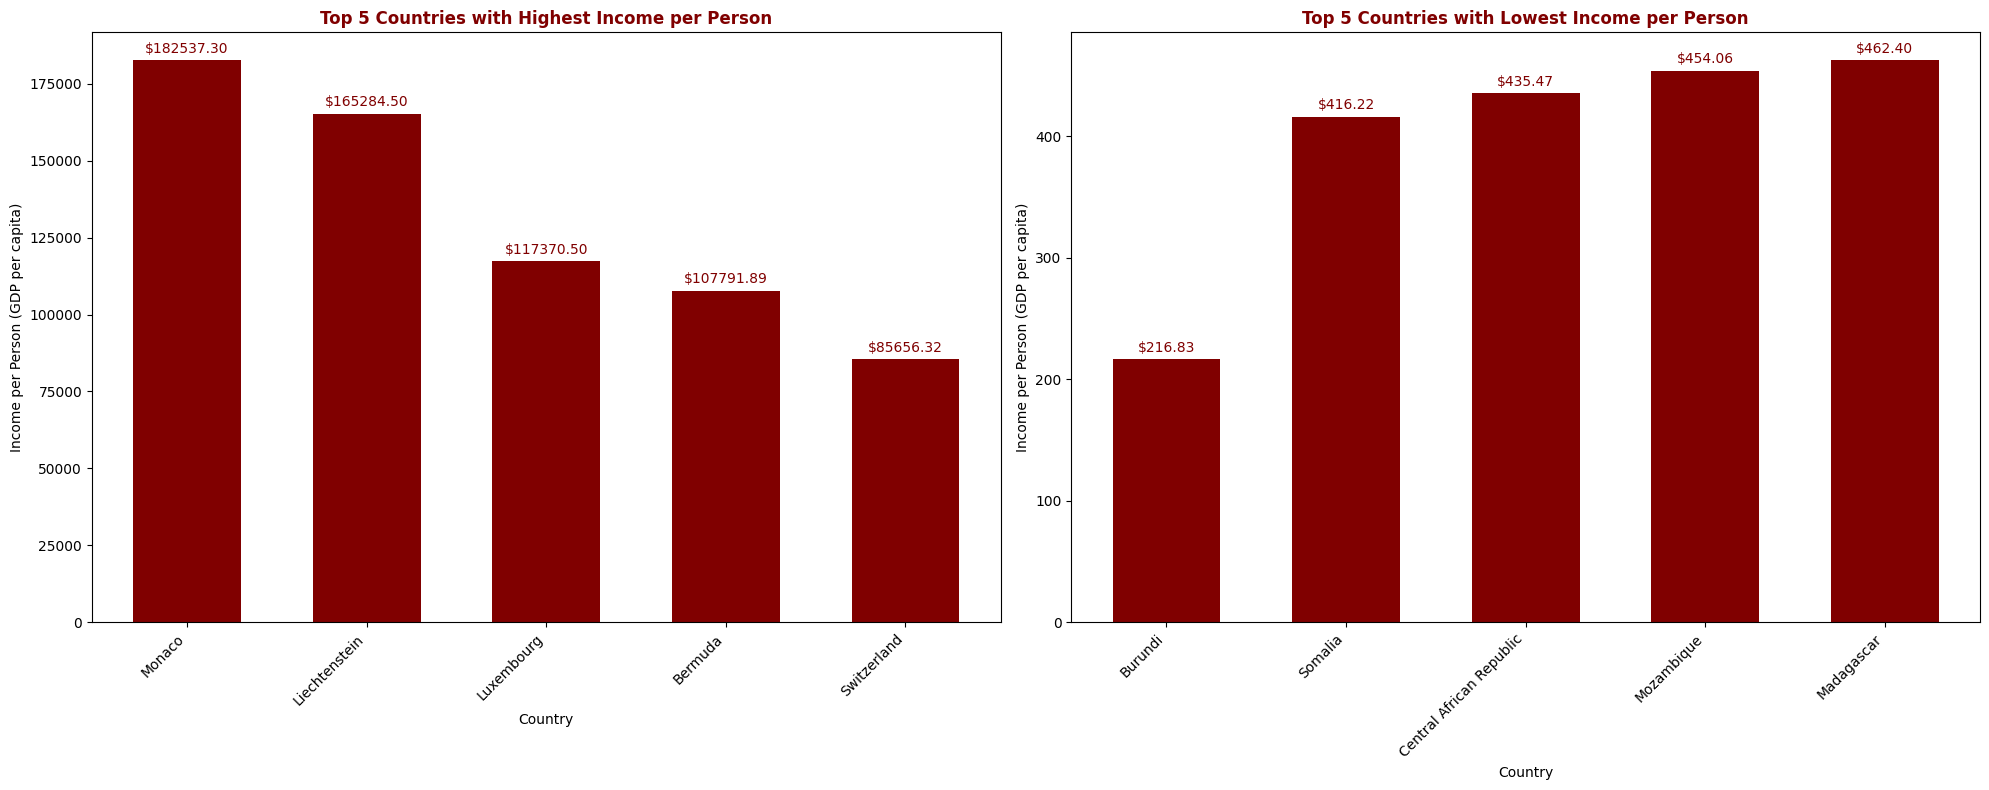

In [13]:
# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Sort the DataFrame by 'incomeperperson' column in descending order and take the top 5 countries
sorted_df_high_income = df.sort_values(by='incomeperperson', ascending=False).head(5)

# Sort the DataFrame by 'incomeperperson' column in ascending order and take the top 5 countries
sorted_df_low_income = df.sort_values(by='incomeperperson', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Income per Person)
bars_high_income = axes[0].bar(sorted_df_high_income['country'], sorted_df_high_income['incomeperperson'],
                            color='#800000', width=0.6)  # Increase the width for spacing

# Add labels and title to the first plot
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Income per Person (GDP per capita)')
axes[0].set_title('Top 5 Countries with Highest Income per Person', fontweight='bold', color='#800000')
axes[0].set_xticklabels(sorted_df_high_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the first plot
for bar in bars_high_income:
    height = bar.get_height()
    axes[0].annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Plot the second bar graph (Top 5 Countries with Lowest Income per Person)
bars_low_income = axes[1].bar(sorted_df_low_income['country'], sorted_df_low_income['incomeperperson'],
                            color='#800000', width=0.6)  # Increase the width for spacing

# Add labels and title to the second plot
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Income per Person (GDP per capita)')
axes[1].set_title('Top 5 Countries with Lowest Income per Person', fontweight='bold', color='#800000')
axes[1].set_xticklabels(sorted_df_low_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the second plot
for bar in bars_low_income:
    height = bar.get_height()
    axes[1].annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\1500109702.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\1500109702.py:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



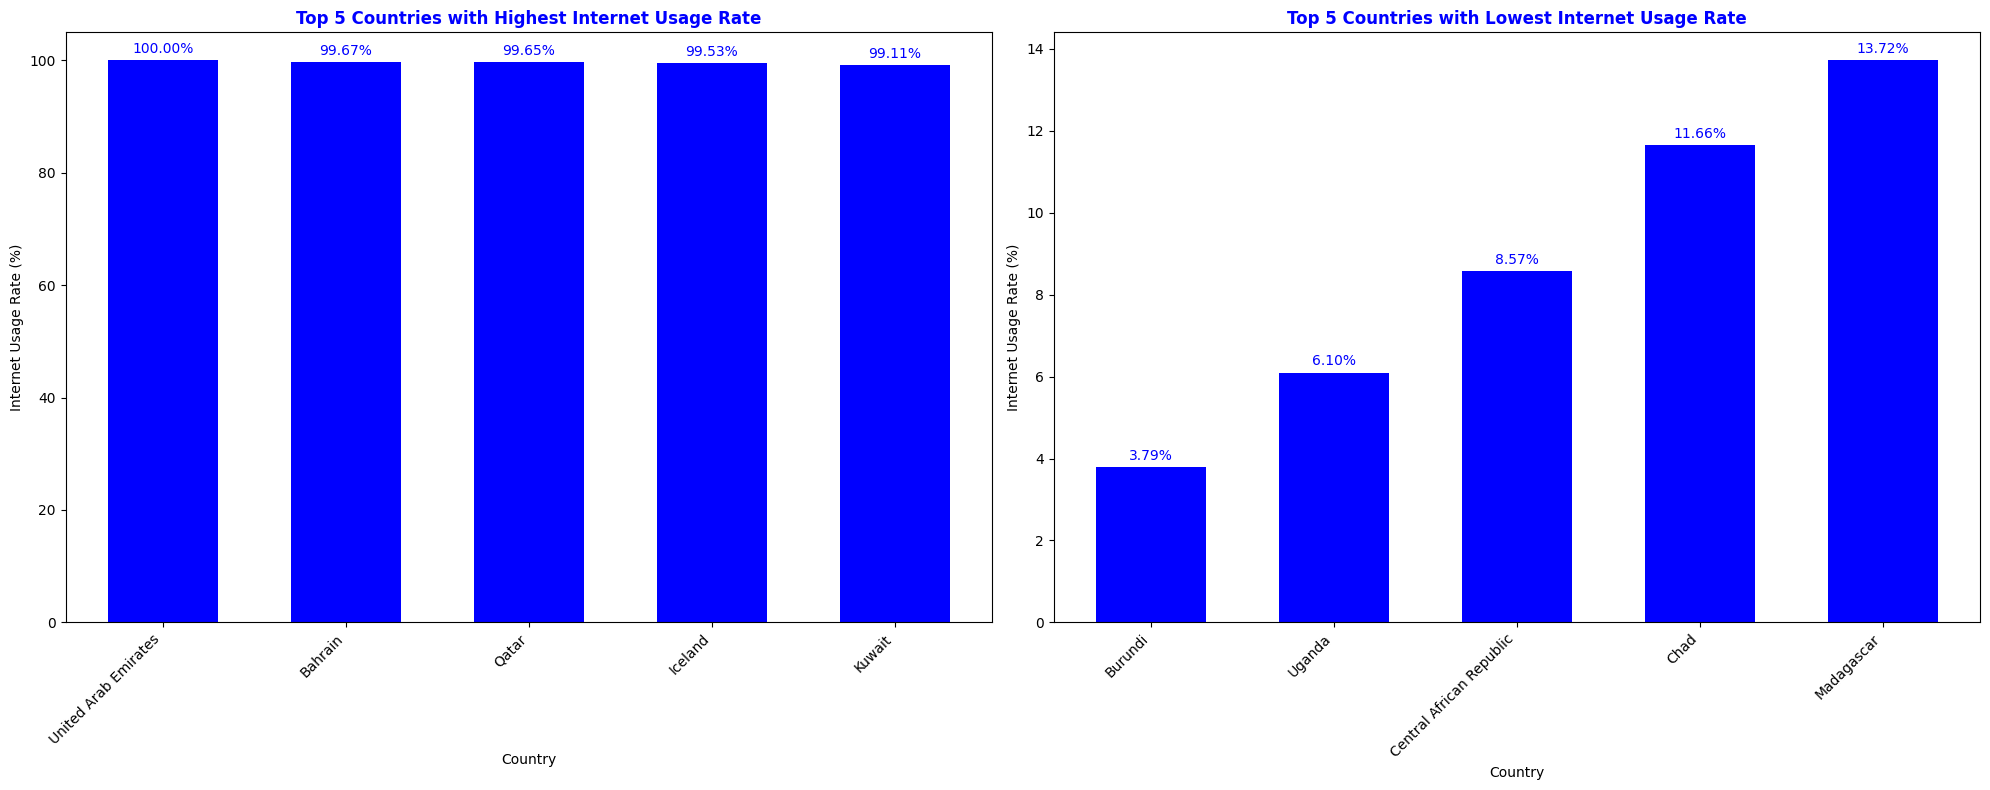

In [14]:

# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Sort the DataFrame by 'internetuserate' column in descending order and take the top 5 countries
sorted_df_high_internet = df.sort_values(by='internetuserate', ascending=False).head(5)

# Sort the DataFrame by 'internetuserate' column in ascending order and take the top 5 countries
sorted_df_low_internet = df.sort_values(by='internetuserate', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Internet Usage Rate)
bars_high_internet = axes[0].bar(sorted_df_high_internet['country'], sorted_df_high_internet['internetuserate'],
                                color='blue', width=0.6)

# Add labels and title to the first plot
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Internet Usage Rate (%)')
axes[0].set_title('Top 5 Countries with Highest Internet Usage Rate', fontweight='bold', color='blue')
axes[0].set_xticklabels(sorted_df_high_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the first plot
for bar in bars_high_internet:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Plot the second bar graph (Top 5 Countries with Lowest Internet Usage Rate)
bars_low_internet = axes[1].bar(sorted_df_low_internet['country'], sorted_df_low_internet['internetuserate'],
                            color='blue', width=0.6)

# Add labels and title to the second plot
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Internet Usage Rate (%)')
axes[1].set_title('Top 5 Countries with Lowest Internet Usage Rate', fontweight='bold', color='blue')
axes[1].set_xticklabels(sorted_df_low_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the second plot
for bar in bars_low_internet:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\1211446994.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\1211446994.py:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



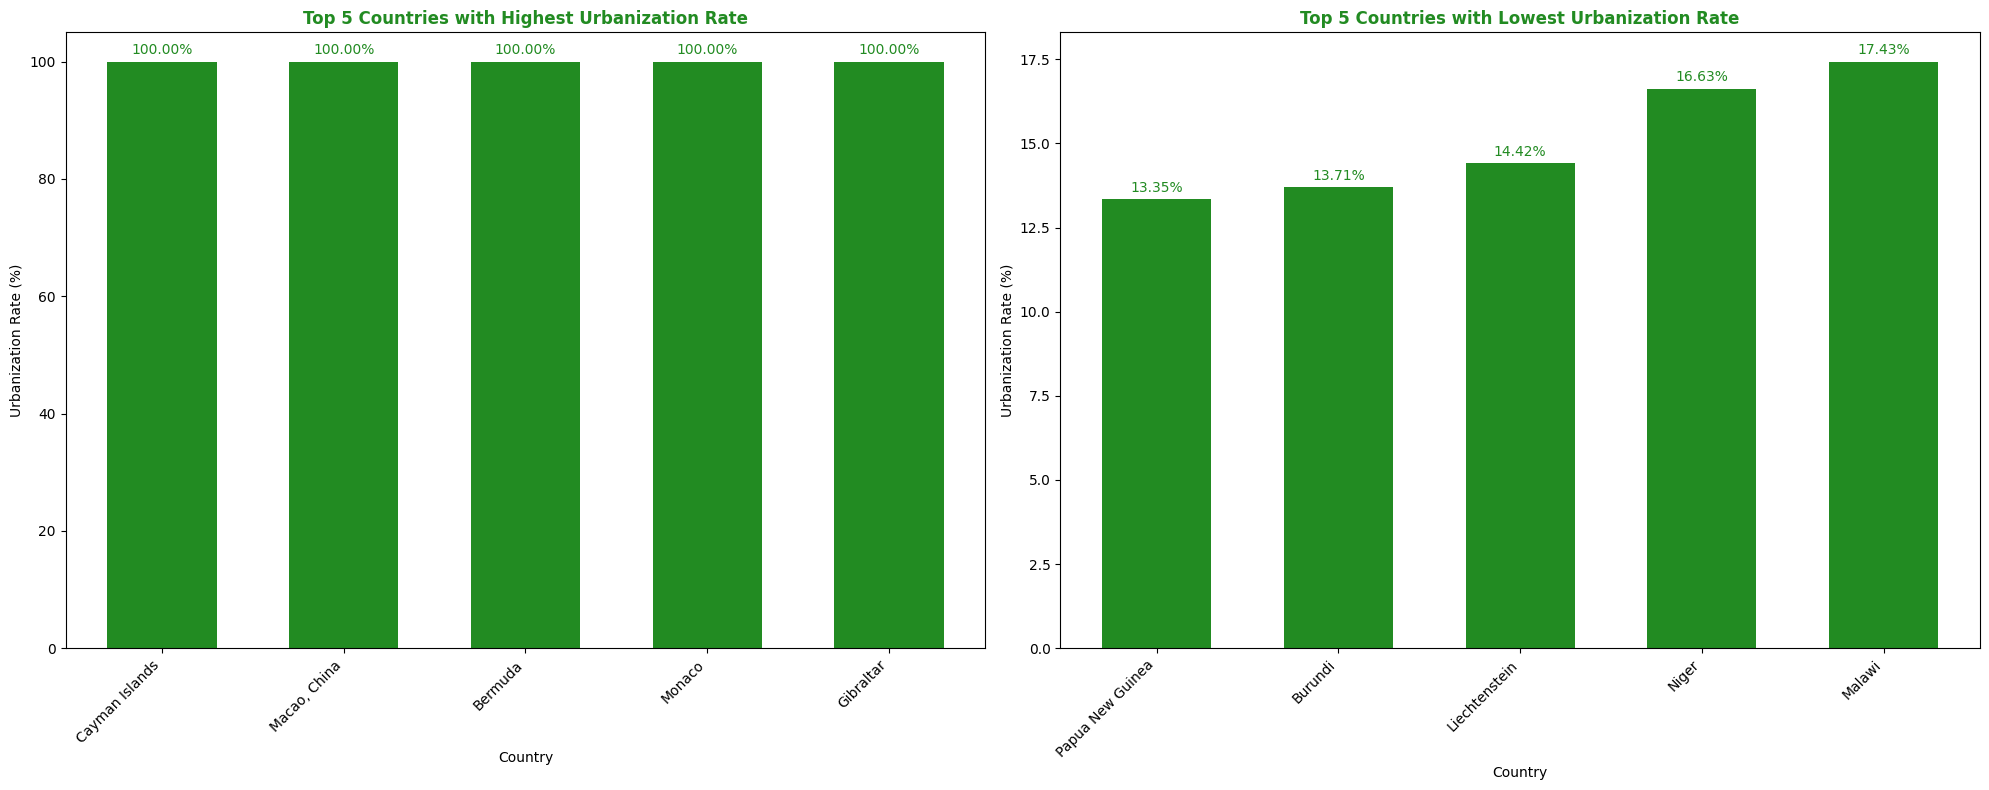

In [15]:

# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Sort the DataFrame by 'urbanrate' column in descending order and take the top 5 countries
sorted_df_high_urban = df.sort_values(by='urbanrate', ascending=False).head(5)

# Sort the DataFrame by 'urbanrate' column in ascending order and take the top 5 countries
sorted_df_low_urban = df.sort_values(by='urbanrate', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Urbanization Rate)
bars_high_urban = axes[0].bar(sorted_df_high_urban['country'], sorted_df_high_urban['urbanrate'],
                            color='#228B22', width=0.6)  # Increase the width for spacing

# Add labels and title to the first plot
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Urbanization Rate (%)')
axes[0].set_title('Top 5 Countries with Highest Urbanization Rate', fontweight='bold', color='#228B22')
axes[0].set_xticklabels(sorted_df_high_urban['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the first plot
for bar in bars_high_urban:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#228B22')

# Plot the second bar graph (Top 5 Countries with Lowest Urbanization Rate)
bars_low_urban = axes[1].bar(sorted_df_low_urban['country'], sorted_df_low_urban['urbanrate'],
                            color='#228B22', width=0.6)  # Increase the width for spacing

# Add labels and title to the second plot
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Urbanization Rate (%)')
axes[1].set_title('Top 5 Countries with Lowest Urbanization Rate', fontweight='bold', color='#228B22')
axes[1].set_xticklabels(sorted_df_low_urban['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the second plot
for bar in bars_low_urban:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#228B22')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


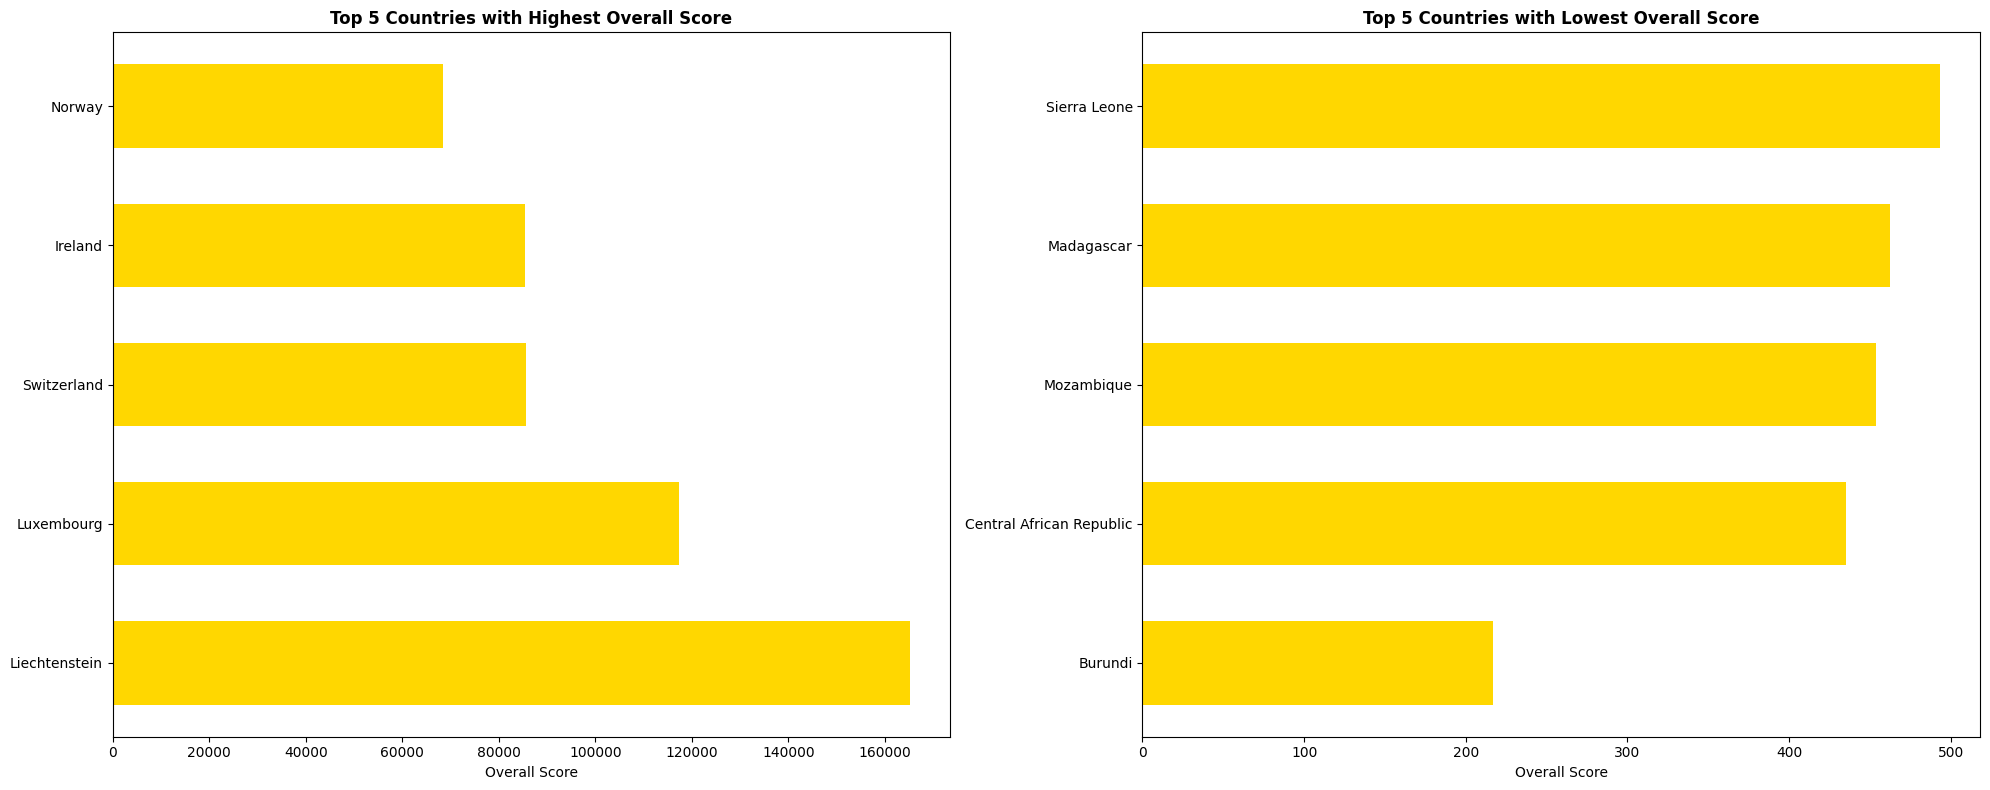

In [16]:
# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Drop rows with missing data in specified columns
cols_to_check = ['incomeperperson', 'internetuserate', 'urbanrate']
df = df.dropna(subset=cols_to_check)

# Calculate the overall score for each country
df['Overall_Score'] = df[cols_to_check].max(axis=1)

# Sort the DataFrame by 'Overall_Score' column in descending order and take the top 5 countries
sorted_df_high_score = df.sort_values(by='Overall_Score', ascending=False).head(5)

# Sort the DataFrame by 'Overall_Score' column in ascending order and take the top 5 countries
sorted_df_low_score = df.sort_values(by='Overall_Score', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Overall Score)
bars_high_score = axes[0].barh(sorted_df_high_score['country'], sorted_df_high_score['Overall_Score'],
                                color='#FFD700', height=0.6)  # Darker Yellow color

# Add labels and title to the first plot
axes[0].set_xlabel('Overall Score')
axes[0].set_title('Top 5 Countries with Highest Overall Score', fontweight='bold', color='black')

# Plot the second bar graph (Top 5 Countries with Lowest Overall Score)
bars_low_score = axes[1].barh(sorted_df_low_score['country'], sorted_df_low_score['Overall_Score'],
                            color='#FFD700', height=0.6)  # Darker Yellow color

# Add labels and title to the second plot
axes[1].set_xlabel('Overall Score')
axes[1].set_title('Top 5 Countries with Lowest Overall Score', fontweight='bold', color='black')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\3255747431.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\3255747431.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_104380\3255747431.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

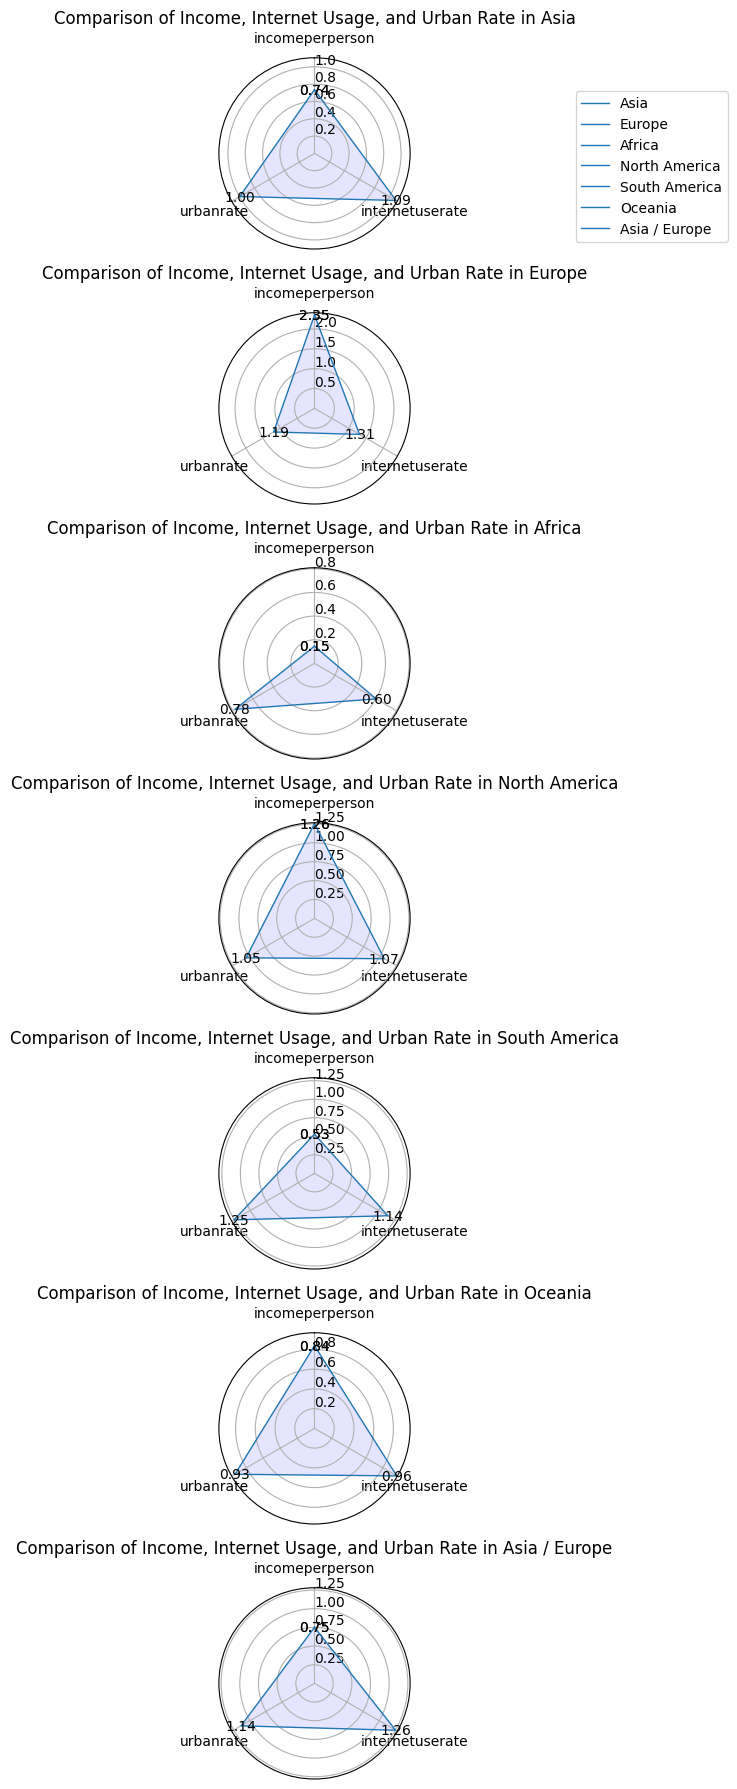

In [17]:
# Read the data from the CSV file into a pandas DataFrame
data = pd.read_csv('2020dataset.csv')

# Calculate overall averages for normalization
overall_avg_income = data['incomeperperson'].mean()
overall_avg_internet = data['internetuserate'].mean()
overall_avg_urban = data['urbanrate'].mean()

# Create subplots for each continent's radar chart
fig, axs = plt.subplots(len(['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Asia / Europe']), 1, figsize=(10, 18), subplot_kw=dict(polar=True))

# Loop through each continent, filter data, normalize variables, and plot radar chart
continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Asia / Europe']
for idx, continent in enumerate(continents):
    continent_data = data[data['continent'] == continent]
    
    # Normalize the data for each variable based on overall averages
    def normalize_column(col, avg_val):
        return col / avg_val
    
    continent_data['incomeperperson'] = normalize_column(continent_data['incomeperperson'], overall_avg_income)
    continent_data['internetuserate'] = normalize_column(continent_data['internetuserate'], overall_avg_internet)
    continent_data['urbanrate'] = normalize_column(continent_data['urbanrate'], overall_avg_urban)

    # Compute the mean values for each variable in the continent
    variables = ['incomeperperson', 'internetuserate', 'urbanrate']
    mean_values = continent_data[variables].mean()

    # Number of variables
    num_variables = len(variables)

    # Create an array of angles for the radar chart
    angles = [n / float(num_variables) * 2 * 3.14159 for n in range(num_variables)]
    angles += angles[:1]

    # Create the radar plot for the current continent
    ax = axs[idx]
    ax.set_theta_offset(3.14159 / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables)
    ax.set_rlabel_position(0)

    # Plot the data for the current continent
    values = mean_values.values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=continent)
    ax.fill(angles, values, 'b', alpha=0.1)

    # Display values next to each axis
    for angle, value in zip(angles, values):
        ax.text(angle, value, f'{value:.2f}', ha='center', va='center')

    # Add title for each continent's radar chart
    ax.set_title(f"Comparison of Income, Internet Usage, and Urban Rate in {continent}")

# Add a common legend to the subplots
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.95))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
